In [2]:
# Final Project, AST4930 - Exoplanets. By Grady Robbins

In [3]:
#Run once:
!pip install pytransit
!pip install pyrr
!pip install emcee
!pip install corner
!pip install astropy
!pip install arviz

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 946.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 741.4/741.4 kB 1.2 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pytransit import QuadraticModel
from decimal import Decimal
import emcee
import corner
from IPython.display import display, Math
import csv 
from numpy import savetxt
from numpy import loadtxt
from multiprocessing import Pool

The semimajor axis of this orbit is 0.05076730399152996AU


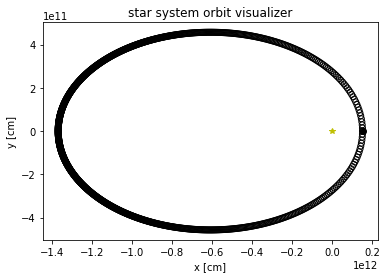

the black circle is the starting point of the orbit
the velocity of the planet at transit is 337.20272417609914 km/s
the planets position intersects the center of the star (origin) between -.77 and .77 solar radii as expected, and the transit is ~1 hour long


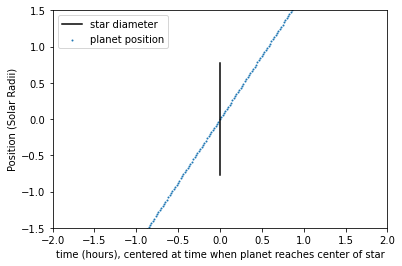

In [46]:
#-----------DATA FROM HOMEWORK 4---------------------

#unique star and planet properties:
Mstar_solar = 0.72 #solar masses
Rstar_solar = 0.77 #solar radii
P = 4.931 #days
i = 89.57*np.pi/180 #rad, inclination
e = 0.8 #eccentricity
peri = 62.86*np.pi/180 #rad, longitude of periaps
Rplanet_earth = 4.16 #Earth radii
Mplanet_earth = 20.8 #Earth masses

#orbital code from hw 3:
                                                                                   
#Orbit computes the orbit of a small mass about a much larger mass.                                           
                                                                                            
#Adapted from:                                                                                                                                                                                                           
#"An Introduction to Modern Astrophysics", Appendix J                                                         
#Bradley W. Carroll and Dale A. Ostlie                                                                        
#Second Edition, Addison Wesley, 2007                                                                                                                                                                                                                                               
###################################################################

#Import needed packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transform
from decimal import Decimal

#Define needed constants
G = 6.67E-8                 ##units: cm**3 / g / s**2
cm_per_AU = 1.5E13          ##units: cm
Msun = 2.0E33                ##units: g
Mearth = 5.972E27            ##units: g
s_per_day = 60. * 60. * 24. ##units: s
R_sun=6.955e10 #cm
R_earth = 6.378e+8

#Prompt user for input variables
ecc = e
omega = 0
Planet_period_days = P
Planet_period_seconds = Planet_period_days*s_per_day

#TO DO: Convert input values to cgs units 
Mstar = Mstar_solar*Msun # star mass to grams
Mplanet = Mplanet_earth*Mearth #planet mass to grams
semi_maj = (((Planet_period_seconds**2)*G*(Mstar))/(4*(np.pi**2)))**(1/3) #semimajor axis to centimeters

omega = omega*np.pi/180 #define orbital rotation
#TO DO: Calculate the orbital period with Kepler's 3rd Law  
#P**2 = a**3 *4*pi**2 / (G*Mstar) planet mass << star mass
#TO DO: Output period of orbit to user and prompt for # of steps (replace placeholder period with real period)

print("The semimajor axis of this orbit is " + str(semi_maj/cm_per_AU) + "AU")
#nstep = float(input("Number of time steps to be calculated: "))
nstep = 1000
#TO DO: Calculate timestep size.                                                                                     
step_size_s = Planet_period_seconds / nstep

#TO DO: Define intial values for variables to be changed with each time step.                                                    

rmin = (semi_maj*(1-ecc**2))/(1+ecc) #define rmin, rmax for reference
rmax = (semi_maj*(1-ecc**2))/(1-ecc)
theta = 2*np.pi - omega #inital rotation
r = (semi_maj*(1-ecc**2))/(1+(ecc*np.cos(theta)))
r0 = r
x = r*np.cos(theta)
y = r*np.sin(theta)
x0 = x
y0 = y
t = 0
Lpermass = (G*Mstar*semi_maj*(1-ecc**2))**(1/2)
x_list = [x] #creating lists to append and graph
y_list = [y]
t_list = [t]
r_list = [r]
#TO DO: Make time steps move forward (for loop or while statement)
for n in range(int(nstep)):    
    deltheta = Lpermass*step_size_s/(r**2)
    #TO DO: within the for or while loop, perform the following steps
    theta = theta + deltheta
    #Calculate distance of object from principle focus                                                        
    r = (semi_maj*(1-ecc**2))/(1+(ecc*np.cos(theta)))
    #Calculate cartesian coordinates and save to array                                                        
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    #Update time                                                                                                                                                                   
    t = t + step_size_s
    #Calculate angular momentum per unit mass.   (doesn't change)                                                             
    #Calculate next theta value based on ang. momentum per unit mass.
    x_list.append(x)
    y_list.append(y)
    t_list.append(t)
    r_list.append(r)

#TO DO: Plot orbital path.  

#These are placeholder X and Y arrays-- yours will contain the X and Y positions of the planet
x_arr = np.array(x_list)
y_arr = np.array(y_list) #converting to arrays for math
t_arr = np.array(t_list)
r_arr = np.array(r_list)
rmin = min(r_list)

for n in range(len(r_list)):
    if rmin == r_list[n]:
        T_peri_eff = t_list[n] #calculating time of perihelion
        
dxdt = ((x_arr[0:-1] - x_arr[1:])/(t_arr[0:-1]-t_arr[1:]))
dydt = ((y_arr[0:-1] - y_arr[1:])/(t_arr[0:-1]-t_arr[1:]))
speed = ((dxdt**2 + dydt**2)**(.5)) 
Kinetic_E = .5*Mplanet*(speed**2)
Potential_E = -G*Mplanet*Mstar/r_arr

T_peri_real = (T_peri_eff) / s_per_day
t_list_day = t_arr / s_per_day/ 365
#fig = plt.figure(figsize=(5,5))
plt.scatter(x_arr, y_arr, facecolors = 'none', edgecolors = 'black')    #Orbital path                                            
plt.plot(0, 0, 'y*')    #Stellar host
plt.plot(x0, y0, 'ko') #stating point
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.title('star system orbit visualizer')
plt.show()
print('the black circle is the starting point of the orbit')
print('the velocity of the planet at transit is',speed[0]/10**5,'km/s')

#From jupyter notebook:
period=P #insert your period here in days

##### DO NOT ALTER THIS. This snippet of code calculates the time array you should use to generate your lightcurves, 
#both from scratch and using exisiting python packages
M_star_low=0.1
M_star_high=10.0

R_high=((M_star_high)**0.57)*R_sun #MR scaling relations for MS stars
R_low=((M_star_low)**0.8)*R_sun

a_high=(((period*s_per_day)**2.0*G*M_star_high*Msun)/(4*np.pi**2.0))**(1.0/3.0)
a_low=(((period*s_per_day)**2.0*G*M_star_low*Msun)/(4*np.pi**2.0))**(1.0/3.0)

duration_high=period*s_per_day/np.pi*(R_high/a_high)
duration_low=period*s_per_day/np.pi*(R_low/a_low)

#Calculating number of 1 min exoposure needed for a 3 hour duration window, 
#if eccentricity is as high as 0.9 and planet transits at apastron
n_high=3*duration_high*(np.sqrt(1-0.9**2)/(1-0.9))/60.
n_low=3*duration_low*(np.sqrt(1-0.9**2)/(1-0.9))/60.

single_transit_time_array=(np.arange(0,n_high)-n_high/2.0)/(60*24) #Short time array in days, centered on a single transit event
#Use the time array below to eventually produce the time array for your lightcurve
time_array=np.concatenate(((np.arange(0,n_high)-n_high/2.0)/(60*24),(np.arange(0,n_high)-n_high/2.0)/(60*24.0)+period)) 
time_array=np.concatenate((time_array,(np.arange(0,n_high)-n_high/2.0)/(60*24)+period*2.0)) #Long time array in days, which will include three transit events

position = single_transit_time_array*24*3600*speed[0] #position in cm
position_Rsun = position/R_sun
plt.plot(np.linspace(0,0,10),np.linspace(-0.77,0.77,10),color="black",label = 'star diameter')
plt.scatter(single_transit_time_array*24, position_Rsun, label = 'planet position',s=1)
#plt.plot(single_transit_time_array, np.linspace(-5,5,len(single_transit_time_array)))
plt.xlabel('time (hours), centered at time when planet reaches center of star')
plt.ylabel('Position (Solar Radii)')
plt.ylim(-1.5,1.5)
plt.xlim(-2,2)
plt.legend()
print('the planets position intersects the center of the star (origin) between -.77 and .77 solar radii as expected, and the transit is ~1 hour long')

pi ~ 3.1456

the transit depth here is ~ 0.254323499491353 %


Text(0.5, 1.0, '10000 points, R = 0.77 Solar Radii')

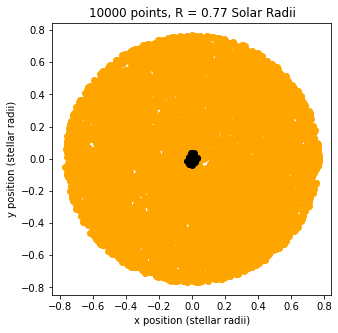

In [47]:
#Final Project 
#2:
#average transit depth of 0.22
b = 0
Rplanet_solar = Rplanet_earth*R_earth/R_sun
N_transit = 0
N_ins = 0
N_tot = 10000
x=[]
y=[]
xstar=[]
ystar=[]
xplanet=[]
yplanet=[]
xtransit=[]
ytransit=[]
for n in range(N_tot):
    x.append(np.random.uniform(-Rstar_solar,Rstar_solar))
    y.append(np.random.uniform(-Rstar_solar,Rstar_solar))
for n in range(N_tot):
    if (x[n]**2 + y[n]**2) <= Rstar_solar**2:
        N_ins +=1
        xstar.append(x[n])
        ystar.append(y[n])
    if ((x[n])**2 + (y[n]+b)**2) <= Rplanet_solar**2:
        xplanet.append(x[n])
        yplanet.append(y[n])
for n in range(len(xplanet)):
    if (xplanet[n]**2 + yplanet[n]**2) <= Rstar_solar**2:
        N_transit +=1
        xtransit.append(xplanet[n])
        ytransit.append(yplanet[n])
print('pi ~',4*N_ins/N_tot)
print()
print('the transit depth here is ~',N_transit/N_ins*100,'%')
fig = plt.figure(figsize=(5,5))
plt.scatter(xstar,ystar, color = 'orange')
plt.scatter(xtransit,ytransit, color = 'black')
plt.xlabel('x position (stellar radii)')
plt.ylabel('y position (stellar radii)')
plt.title(str(N_tot)+' points, R = 0.77 Solar Radii')

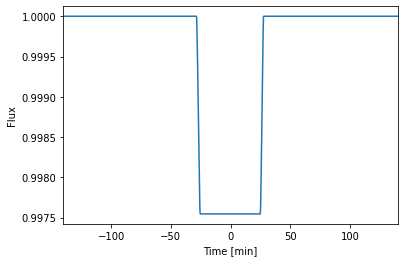

In [92]:
#PyTransit Transit Model:
tm = QuadraticModel()
tm.set_data(single_transit_time_array) #time needs to be specified in days

t0=0.
aonr=a_high/R_high
k= Rplanet_solar/Rstar_solar #R_p/R_star

single_transit_lightcurve=tm.evaluate(k=k, ldc=[0.0, 0.0], t0=t0, p=period, a=aonr, i=i,e=e,w=omega)

tm.set_data(time_array) #time needs to be specified in days
three_transit_lightcurve=tm.evaluate(k=k, ldc=[0.0, 0.0], t0=t0, p=period, a=aonr, i=i,e=e,w=omega)
plt.plot(single_transit_time_array*24*60/3.7,single_transit_lightcurve)
plt.xlabel('Time [min]')
plt.ylabel('Flux')
plt.xlim(-140,140)
plt.show()

In [65]:
transit_time_array_s = np.array([])
x_position_array_solar = np.array([])
transit_indice = []
for n in range(len(single_transit_time_array)):
    if position[n]/R_sun <= Rstar_solar*1.2 and position[n]/R_sun >= -Rstar_solar*1.2:
        transit_time_array_s = np.append(transit_time_array_s,single_transit_time_array[n]*3600*24)
        x_position_array_solar = np.append(x_position_array_solar,single_transit_time_array[n]*3600*24*speed[0]/R_sun)
        transit_indice.append(n)

In [101]:
#true transit depth of 0.24%
Flux = np.array([])
for k in range(len(transit_time_array_s)):
    Rplanet_solar = Rplanet_earth*R_earth/R_sun
    N_transit = 0
    N_ins = 0
    N_tot = 100000
    x=[]
    y=[]
    xstar=[]
    ystar=[]
    xplanet=[]
    yplanet=[]
    xtransit=[]
    ytransit=[]
    for n in range(N_tot):
        x.append(np.random.uniform(-Rstar_solar,Rstar_solar))
        y.append(np.random.uniform(-Rstar_solar,Rstar_solar))
    for n in range(N_tot):
        if (x[n]**2 + y[n]**2) <= Rstar_solar**2:
            N_ins +=1
            xstar.append(x[n])
            ystar.append(y[n])
        if ((x[n]-x_position_array_solar[k])**2 + (y[n]+b)**2) <= Rplanet_solar**2:
            xplanet.append(x[n])
            yplanet.append(y[n])
    for n in range(len(xplanet)):
        if (xplanet[n]**2 + yplanet[n]**2) <= Rstar_solar**2:
            N_transit +=1
            xtransit.append(xplanet[n])
            ytransit.append(yplanet[n])
    Flux = np.append(Flux,1 - ((N_transit/N_ins)))
print('done')

done


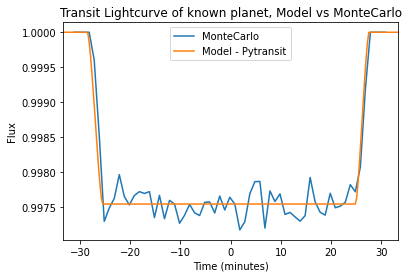

In [102]:
#Image 1: Transit model and Montecarlo Flux Comparison
plt.plot(transit_time_array_s/60, Flux, label = 'MonteCarlo')
plt.plot(single_transit_time_array*24*60/3.7,single_transit_lightcurve, label = 'Model - Pytransit')
plt.xlabel('Time (minutes)')
plt.ylabel('Flux')
plt.title('Transit Lightcurve of known planet, Model vs MonteCarlo')
plt.xlim(-2000/60,2000/60)
plt.legend()
plt.savefig('Time_vs_Flux_known_GR.png',dpi=300,bbox_inches='tight')
plt.show()

62
